# Kütüphaneler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

# veri yukleme

In [5]:
veriler = pd.read_csv('../veri/maaslar.csv')

x = veriler.iloc[:,1:2]
y = veriler.iloc[:,2:]
X = x
Y = y

# linear regression


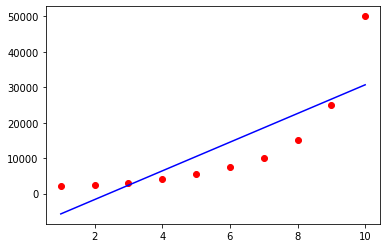

Linear R2 degeri
0.6690412331929894


In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

plt.scatter(X,Y,color='red')
plt.plot(x,lin_reg.predict(X), color = 'blue')
plt.show()

print('Linear R2 degeri')
print(r2_score(Y, lin_reg.predict(X)))

# polynomial regression


[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


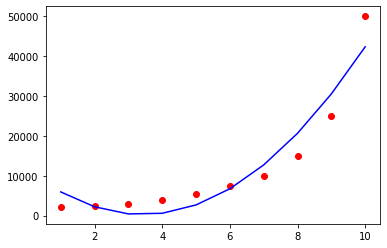

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


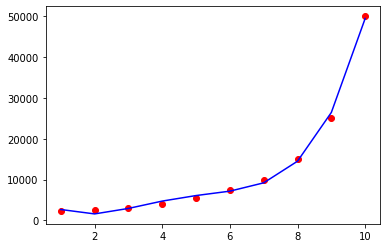

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()


# tahminler

In [9]:
print(lin_reg.predict([[11]]))
print(lin_reg.predict([[6.6]]))

print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))
print(lin_reg2.predict(poly_reg.fit_transform([[11]])))

print('Polynomial R2 degeri')
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))


[[34716.66666667]]
[[16923.33333333]]
[[8146.9948718]]
[[89041.66666669]]
Polynomial R2 degeri
0.9973922891706614


c:\Users\OmerYildiz\anaconda3\envs\makineogrenmesi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\OmerYildiz\anaconda3\envs\makineogrenmesi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# verilerin olceklenmesi


In [11]:
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()

x_olcekli = sc1.fit_transform(X)

sc2=StandardScaler()
y_olcekli = sc2.fit_transform(Y)

c:\Users\OmerYildiz\anaconda3\envs\makineogrenmesi\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


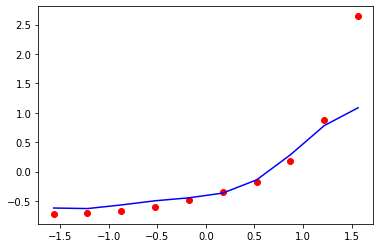

[0.01150915]
[0.01150915]
SVR R2 degeri
0.7513836788854973


In [13]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)

plt.scatter(x_olcekli,y_olcekli,color='red')
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color='blue')

plt.show()
print(svr_reg.predict([[11]]))
print(svr_reg.predict([[6.6]]))

print('SVR R2 degeri')
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))

# Decision Tree Regresyon

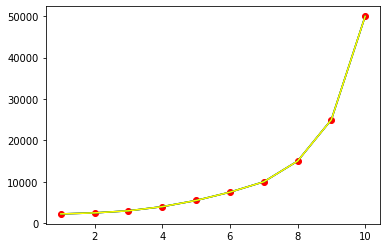

[50000.]
[10000.]
Decision Tree R2 degeri
1.0


c:\Users\OmerYildiz\anaconda3\envs\makineogrenmesi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\OmerYildiz\anaconda3\envs\makineogrenmesi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [14]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)
Z = X + 0.5
K = X - 0.4

plt.scatter(X,Y, color='red')
plt.plot(x,r_dt.predict(X), color='blue')
plt.plot(x,r_dt.predict(Z),color='green')
plt.plot(x,r_dt.predict(K),color='yellow')
plt.show()
print(r_dt.predict([[11]]))
print(r_dt.predict([[6.6]]))

print('Decision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))

# Random Forest Regresyonu


[10500.]


C:\Users\OmerYildiz\AppData\Local\Temp\ipykernel_18564\2207993255.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X,Y)
c:\Users\OmerYildiz\anaconda3\envs\makineogrenmesi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


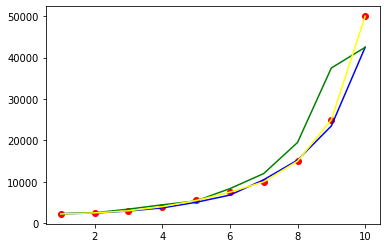

Random Forest R2 degeri
0.9704434230386582
0.9704434230386582
0.8820523231127324


In [16]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y)

print(rf_reg.predict([[6.6]]))

plt.scatter(X,Y,color='red')
plt.plot(X,rf_reg.predict(X),color='blue')

plt.plot(X,rf_reg.predict(Z),color='green')
plt.plot(x,r_dt.predict(K),color='yellow')
plt.show()




print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))

print(r2_score(Y, rf_reg.predict(K)))
print(r2_score(Y, rf_reg.predict(Z)))

In [17]:
#Ozet R2 değerleri
print('-----------------------')
print('Linear R2 degeri')
print(r2_score(Y, lin_reg.predict(X)))

print('Polynomial R2 degeri')
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))

print('SVR R2 degeri')
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))


print('Decision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))

print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))

-----------------------
Linear R2 degeri
0.6690412331929894
Polynomial R2 degeri
0.9973922891706614
SVR R2 degeri
0.7513836788854973
Decision Tree R2 degeri
1.0
Random Forest R2 degeri
0.9704434230386582
